In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
    
def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DeprecationWarning) 
    warnings.filterwarnings('ignore', category = FutureWarning) 


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 25)
train = pd.read_csv('bank-additional-full.csv',sep = ';', )
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
catagorical_columns = ['job', 'marital', 'education', 'default', 'housing','previous',
                      'loan','contact', 'month', 'day_of_week', 'poutcome', 'y']
numerical_column = ['age','duration', 'pdays', 'emp.var.rate', 'campaign',
                    'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

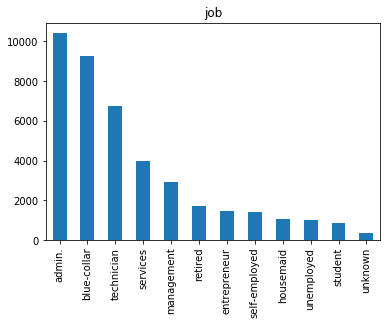

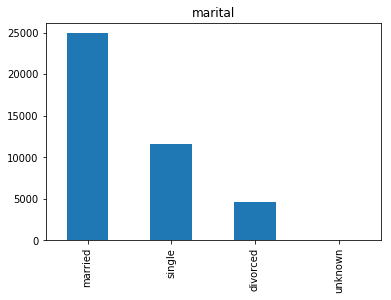

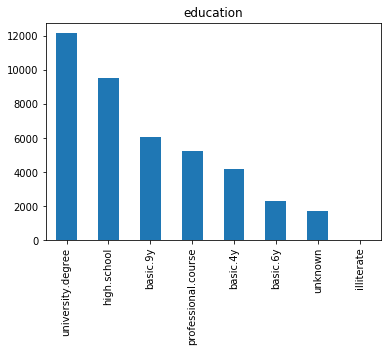

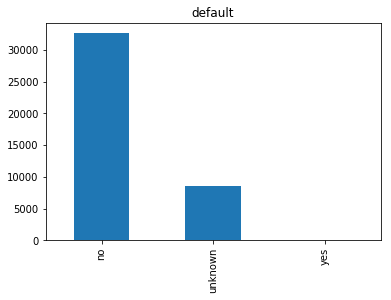

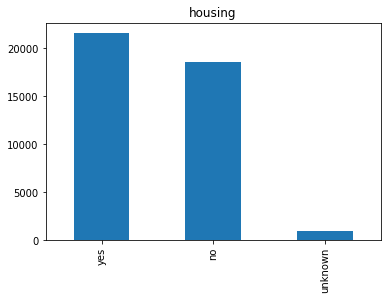

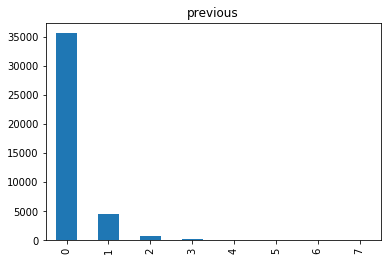

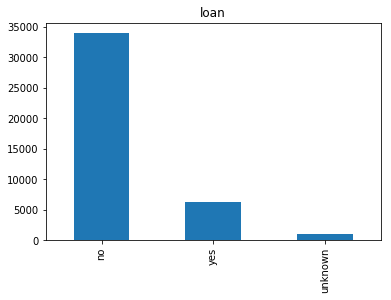

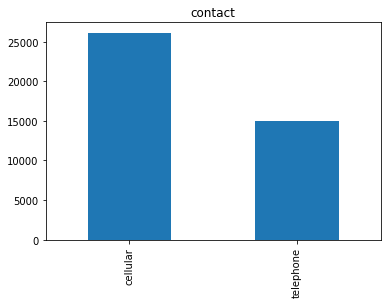

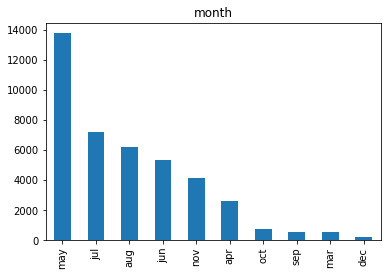

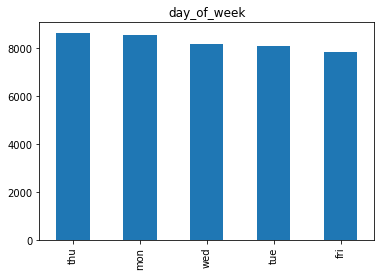

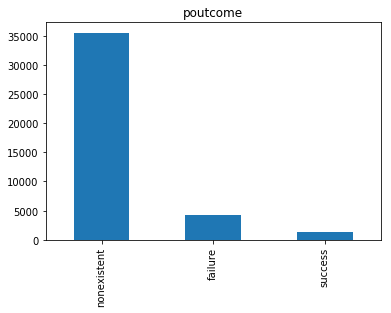

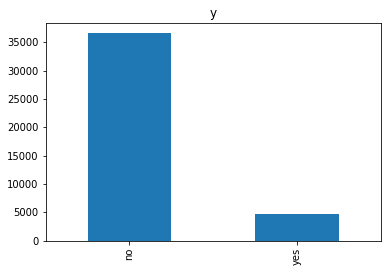

In [6]:
for col in catagorical_columns:
    train[col].value_counts().plot.bar(title = str(col))
    plt.show()

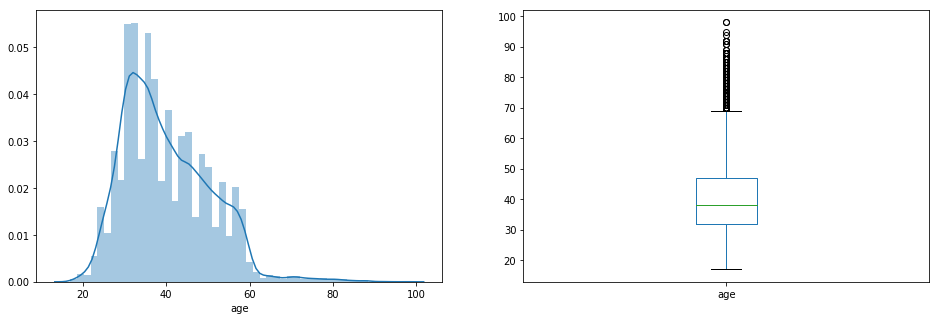

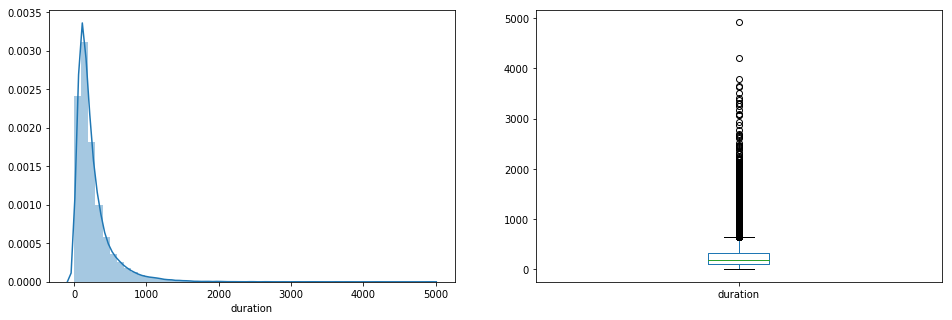

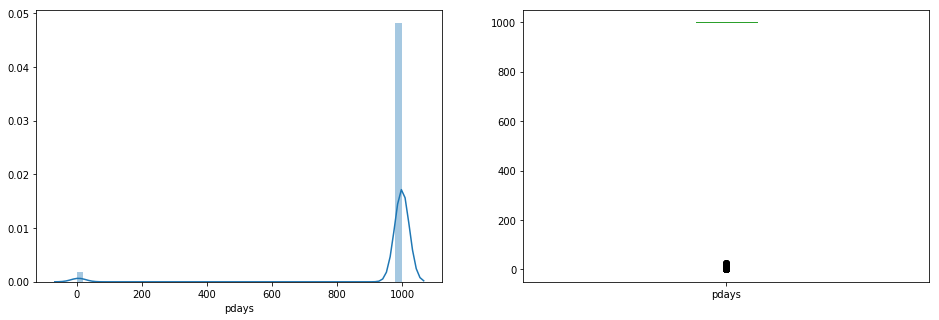

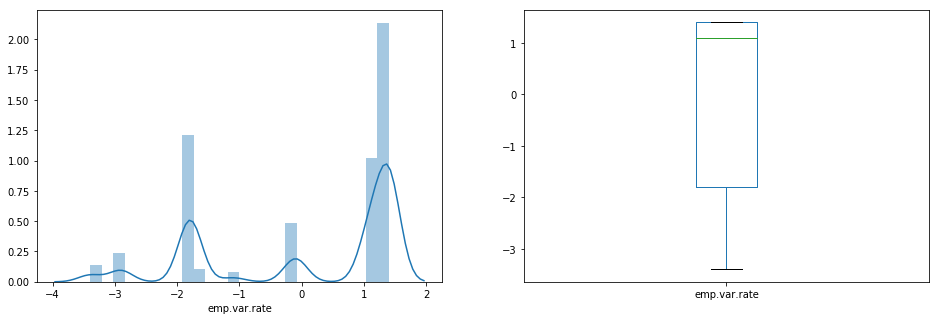

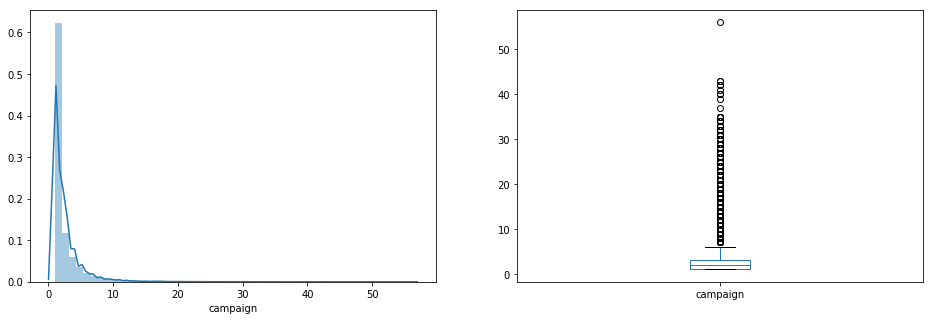

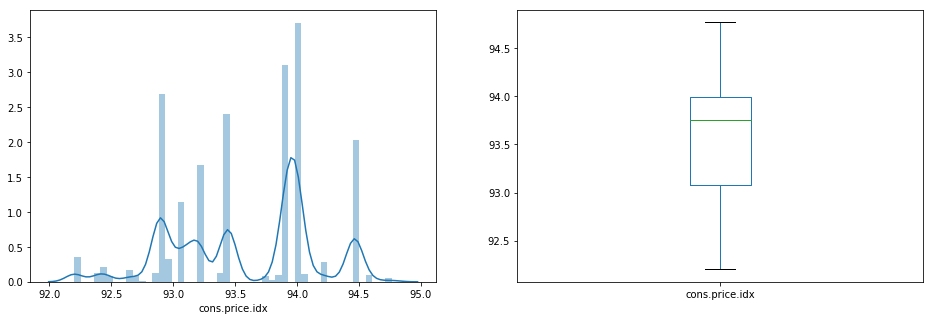

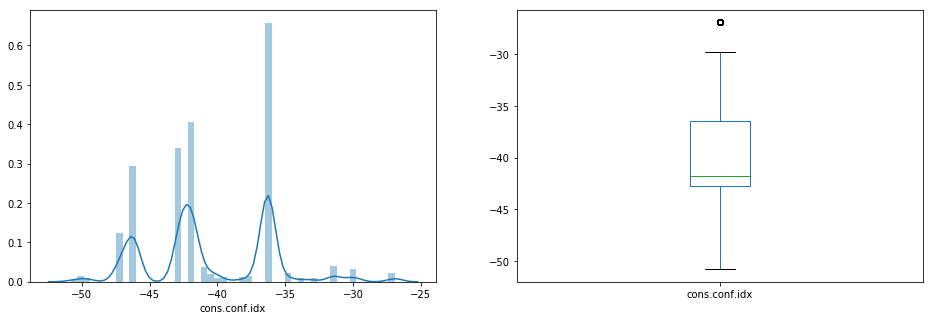

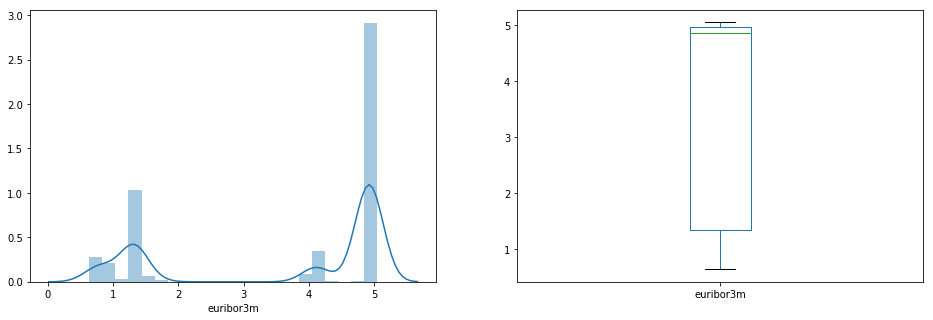

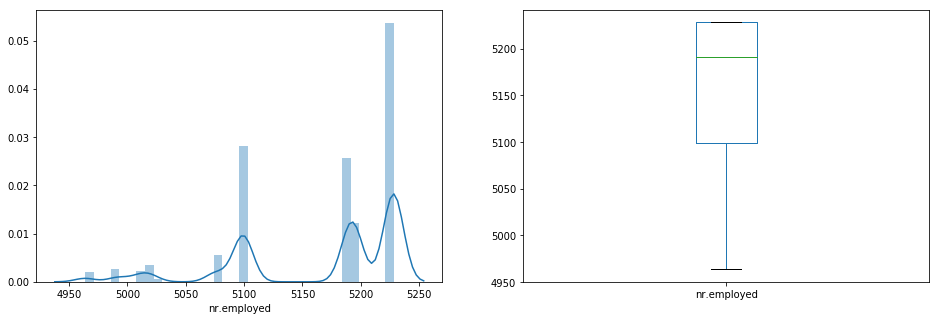

In [7]:
for i in numerical_column:
    
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(train[str(i)]);

    plt.subplot(122)
    train[str(i)].plot.box(figsize=(16,5))

    plt.show()

In [8]:
train.replace(to_replace= 'unknown', value= np.nan, inplace=True)
train.replace(to_replace= 'yes', value= 1, inplace = True)
train.replace(to_replace= 'no', value= 0, inplace = True)
train.dropna(inplace=True)

In [9]:
train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
train=pd.get_dummies(train)

In [11]:
train.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,1,0,0,0,0,1,0
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,1,0,0,0,0,1,0
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,1,0,0,0,0,1,0
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,1,0,0,0,0,1,0
6,59,0.0,0.0,0.0,139,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,1,0,0,0,0,1,0


In [12]:
y = train.y
X= train.drop(columns = ['y'])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

# Evaluation

In [14]:
seed = 43
"""Building machine learning models:
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters 
that will best generalize the unseen(test) data."""

'''Now initialize all the classifiers object.'''
'''#1.Logistic Regression'''

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)

'''#10.Extreme Gradient Boosting'''
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state = seed)





'''Create a function that returns train accuracy of different models.'''

def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

def test_accuracy(model):
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
#     test_accuracy = np.round(train_accuracy*100)
    return test_accuracy


'''Models with best training accuracy:'''
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), 
                                                    train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), 
                                                    train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc), 
                                                    train_accuracy(xgbc)], 
                               'Test_accuracy(%)': [test_accuracy(lr), test_accuracy(svc), test_accuracy(rf), 
                                                    test_accuracy(knn), test_accuracy(gnb), test_accuracy(dt), 
                                                    test_accuracy(gbc), test_accuracy(abc), test_accuracy(etc), 
                                                    test_accuracy(xgbc)]})


train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']


sorted_train_accuracy = train_accuracy.sort_values(by = 'Test_accuracy(%)', ascending = False)



bold('**Training Accuracy of the Classifiers:**')
display(sorted_train_accuracy)
suppress_warnings()


/home/sush/bs4/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sush/bs4/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sush/bs4/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Training Accuracy of the Classifiers:**

,Train_accuracy(%),Test_accuracy(%)
GBC,91.56,0.907183
XGBC,91.50,0.905543
RF,100.00,0.902919
LR,89.94,0.902099
ABC,90.13,0.897999
KNN,92.31,0.895212
ETC,100.00,0.887668
SVC,96.06,0.881437
DT,100.00,0.871925
GNB,85.28,0.856838
